In [18]:
# Reading of Data set (wear)
import pandas as pd # it will help to read tabuar data from excel/csv/dat files etc
df=pd.read_excel(r"C:\ml_project\wear_dataset_3.xls",["final_merged_Dataset"])
df=df["final_merged_Dataset"]


In [19]:
df.head()

,sno,Material,load (N),time (s),friction (N),wear (µm),Time (min)
0,1,0.0,5,0.921,-0.92,-0.12,15
1,2,0.0,5,1.828,0.02,-0.14,15
2,3,0.0,5,2.734,0.02,-0.15,15
3,4,0.0,5,3.640,0.00,-0.15,15
4,5,0.0,5,4.562,-0.04,-0.15,15


In [20]:
df.isnull().sum()

sno             0
Material        0
load (N)        0
time (s)        0
friction (N)    0
wear (µm)       0
Time (min)      0
dtype: int64

In [21]:
# find negative values in the dataset columnwise
df.where(df<0).count()

sno                0
Material           0
load (N)           0
time (s)           0
friction (N)     587
wear (µm)       5033
Time (min)         0
dtype: int64

In [22]:
df_updated = df[(df >= 0).all(axis=1)]
df_updated.shape

(55392, 7)

In [23]:
df_updated.columns

Index(['sno', 'Material', 'load (N)', 'time (s)', 'friction (N)', 'wear (µm)',
       'Time (min)'],
      dtype='object')

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

# Group the data based on 'Material' and 'load (N)'
grouped = df_updated.groupby(['Material', 'load (N)'])

# Plot the time vs wear graphs for each group using seaborn
for (material, load), group in grouped:
    plt.figure()
    sns.lineplot(data=group, x='time (s)', y='wear (µm)', hue='Time (min)')
    plt.title(f'Material: {material}, Load: {load} N')
    plt.xlabel('Time (s)')
    plt.ylabel('Wear (µm)')
    plt.show()

In [30]:
filtered_df = df_updated[(df_updated['Material'] == 0.10) & (df_updated['load (N)'] == 15)]
filtered_df

,sno,Material,load (N),time (s),friction (N),wear (µm),Time (min)
35380,4002,0.1,15,42.156,0.06,0.03,30
35381,4003,0.1,15,43.141,0.48,0.04,30
35382,4004,0.1,15,44.110,1.32,0.04,30
35383,4005,0.1,15,45.094,2.40,0.02,30
43152,11774,0.1,15,28.203,0.04,2.42,45
...,...,...,...,...,...,...,...
46090,14712,0.1,15,2700.157,413.82,1.15,45
46091,14713,0.1,15,2701.063,414.01,1.12,45
46092,14714,0.1,15,2701.969,413.73,1.07,45
46093,14715,0.1,15,2702.875,413.68,1.05,45


In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt

# filter data at time = 15 min 
df_15 = df[df['Time (min)'] == 45]

# plot the wear vs time graph
plt.figure()
sns.lineplot(data=df_15, x='time (s)', y='wear (µm)', hue='Material')
plt.title('Wear vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Wear (µm)')
plt.show()



AttributeError: Line2D.set() got an unexpected keyword argument 'hue'

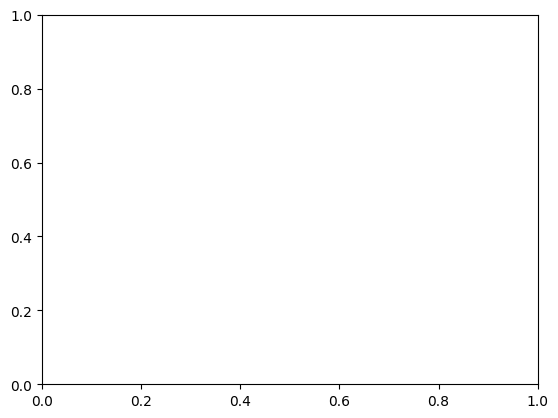

In [26]:
import matplotlib.pyplot as plt

# Group the data based on 'Material' and 'load (N)'
grouped = df_updated.groupby(['Material', 'load (N)'])

# Plot the time vs wear graphs for each group
for (material, load), group in grouped:
    plt.figure()
    plt.plot(group['time (s)'], group['wear (µm)'], hue="Time (min)")
    plt.title(f'Material: {material}, Load: {load} N')
    plt.xlabel('Time (s)')
    plt.ylabel('Wear (µm)')
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df_updated[[ 'Material', 'load (N)', 'time (s)', 'friction (N)']]
y = df_updated['wear (µm)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 2303.557470879268
R^2 Score: 0.8675297918408069


In [ ]:
accuracy = model.score(X_test, y_test)
print(f'Model Accuracy: {accuracy}')

Model Accuracy: 0.8675297918408069


In [ ]:
model.intercept_

np.float64(-72.41379731908862)

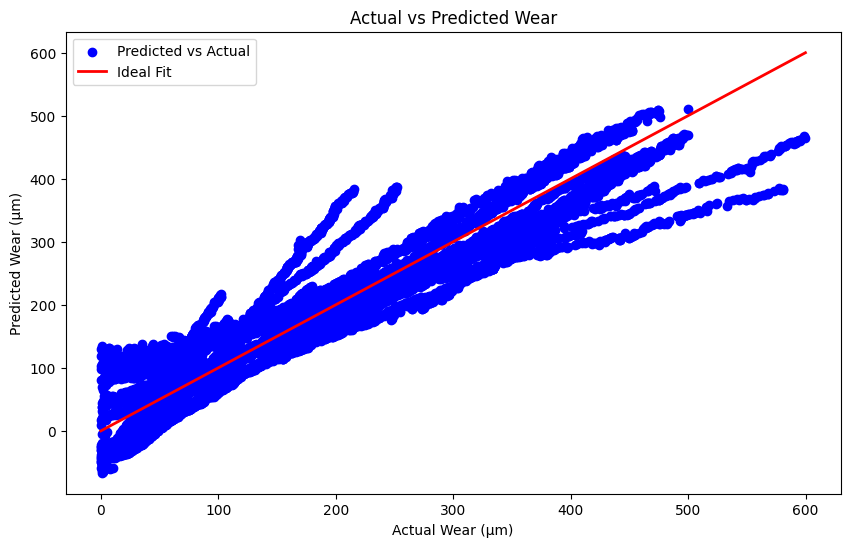

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Ideal Fit')
plt.xlabel('Actual Wear (µm)')
plt.ylabel('Predicted Wear (µm)')
plt.title('Actual vs Predicted Wear')
plt.legend()
plt.show()

In [ ]:
model.predict([[0.15,	15,	2555.547,	1.64]])

c:\Users\kprav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([456.71814243])

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# Initialize the SVR model
svr = SVR()

# Initialize GridSearchCV with the SVR model and the parameter grid
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Score: {best_score}')

# Predict using the best estimator
y_pred_svr = grid_search.best_estimator_.predict(X_test)

# Calculate the mean squared error and R^2 score for the predictions
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f'SVR Mean Squared Error: {mse_svr}')
print(f'SVR R^2 Score: {r2_svr}')

Fitting 5 folds for each of 32 candidates, totalling 160 fits


KeyboardInterrupt: 